## In this assignment, we will be using the K-nearest neighbors
## algorithm to predict how many points NBA players scored in the 2013-2014
## season.
source of Data:https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

In [149]:
# import all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [150]:
#import data
df=pd.read_csv('nba_2013.csv')
# reading data
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [151]:
# printing the summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

We can see that our dataset contains object data types in column: season,pos,player,bref_team_id.We have to convert them into numbers before feeding it to our model.

In [128]:
# finding the count of missing values from different columns
df.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

 As we can se we have some null values in our dataset.We have to fill them with mean/median before building a machine learning model.We notice here that all the missing values are in numeric feature column,there is no missing value in categorical feature columns.

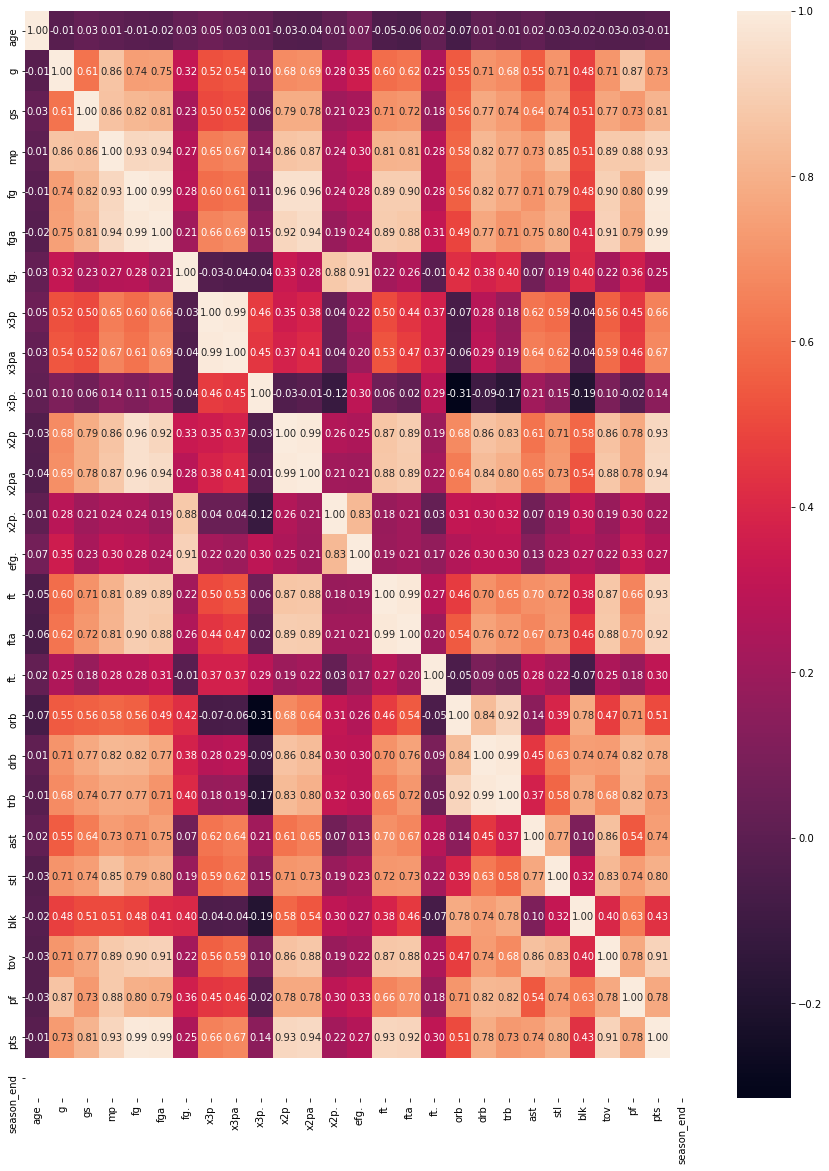

In [129]:
fig,ax=plt.subplots(figsize=(15,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f');
#from pandas_profiling import ProfileReport
#ProfileReport(df)

From above correlation matrix, we can infer that features like mp,fg,fga,x2p,x2pa,ft,fta,tov are strongly positive correlated with target variable i.e.pts

In [130]:
#to check columns name present in our dataset
df.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [131]:
#separating feature variable & target variable
# we have droped features like bref_team_id,season,season_end,pos & Player Name as 
x=df.drop(['pts','bref_team_id','player','pos','season','season_end'],axis=1)
# as our task is predicting points of NBA players so our target column will be pts
y=df['pts']


In [132]:
# splitting the data into train_test_split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



## we have splitted our data before preprocessing to avoid data leakage.We will separately process train & test data

In [133]:
#replacing numeric missing value with median(not mean) in training data as median is more robust to outliers
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_integer_dtype.html
for label,content in x_train.items():# in this line we are creating a dictionary of columns present in our dataset
    if pd.api.types.is_numeric_dtype(content):#checking if the values in column is numeric
        if pd.isnull(content).sum():#checking the null values in column
            x_train[label]=content.fillna(content.median())#replacing null value with median

In [134]:
x_train.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
dtype: int64

As we can see above there are no null values in train data

In [135]:
#replacing numeric missing value with median(not mean) in test data as median is more robust to outliers
for label,content in x_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            x_test[label]=content.fillna(content.median())

In [136]:
x_test.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
dtype: int64

As we can see above there are no null values in test data

In [137]:
# scaling of features so that all the features have common scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)#fit & transform apply on training data
x_test_scaled=scaler.transform(x_test)#only transform will apply on test data

## As problem statement is to predict how many points NBA player scored,so its a regression problem & we will use KNeighborsRegressor

In [138]:
#tuning of model KNeighbourRegressor
from sklearn.neighbors import KNeighborsRegressor
train_scores=[]#accuracy of model on training data will be stored in this empty list
test_scores=[]#accuracy of model on test data will be stored in this empty list
k=list(range(1,25))# range of K for n_neighbors
for i in k:
    knn= KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    train_scores.append(knn.score(x_train_scaled,y_train))
    test_scores.append(knn.score(x_test_scaled,y_test))

In [139]:
train_scores

[1.0,
 0.9847927320757889,
 0.9792499424958178,
 0.9747025031075855,
 0.9731883499269596,
 0.9719925892310449,
 0.9694410358612354,
 0.9697541945378036,
 0.9679291097560805,
 0.9664885622794134,
 0.964617041476441,
 0.9625686218766736,
 0.9609929793906464,
 0.9591290703763475,
 0.9579856059621579,
 0.9561265824871933,
 0.9535503619263548,
 0.9513341996547776,
 0.9499261056545942,
 0.948326295025275,
 0.9469052367075051,
 0.945759440435559,
 0.944300859704212,
 0.9425086676858228]

In [140]:
test_scores

[0.9410302011126367,
 0.9614441554126739,
 0.9689786098898592,
 0.9739755932476203,
 0.9728059197346205,
 0.972838714583804,
 0.9760165319991996,
 0.9748104084140812,
 0.9752779678038159,
 0.9752352279532825,
 0.9752539692343809,
 0.9752575419009097,
 0.9741413581607165,
 0.9708443013911665,
 0.9707983810346159,
 0.9706330779715963,
 0.9698504711151663,
 0.9689072379092772,
 0.9684762928011109,
 0.9669031109991137,
 0.9645541213941411,
 0.9628421525900325,
 0.9617739994632177,
 0.9615198408350112]

Maximum KNN score on test data is:97.60%


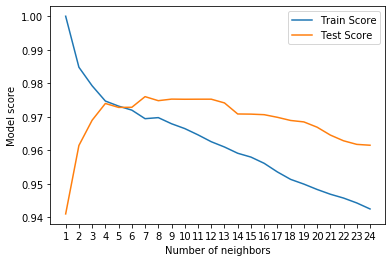

In [141]:
#visualizing train & test score against K(n_neighbors)
plt.plot(k,train_scores,label='Train Score')
plt.plot(k,test_scores,label='Test Score')
plt.xticks(range(1,25))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f'Maximum KNN score on test data is:{max(test_scores)*100:.2f}%')

In [142]:
# finding the best parameter of our model using RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.model_selection import RandomizedSearchCV
#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,25))
#p=[1,2]
knn_grid={'n_neighbors':list(range(1,25)),
         'leaf_size':list(range(1,50)),
         'p':[1,2]}
rs=RandomizedSearchCV(KNeighborsRegressor(),
                     param_distributions=knn_grid,
                     n_iter=100,
                     cv=5,
                     verbose=True,random_state=42)
rs.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 

In [143]:
#getting the best parameters 
rs.best_params_

{'p': 1, 'n_neighbors': 5, 'leaf_size': 2}

In [144]:
# training model with best parameters
knn2=KNeighborsRegressor(n_neighbors=5,leaf_size=2,p=1)
knn2.fit(x_train_scaled,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=2, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')

In [145]:
#predicting on test data with best parameters
y_preds=knn2.predict(x_test_scaled)

In [146]:
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_test,y_preds)
r2

0.9826365601342982

## So,finally the accuracy of our model in predecting the unseen data with best parameters is 0.9826 or 98.26%  

In [147]:
# mean absolute error
mae=mean_absolute_error(y_test,y_preds)
mae

35.81649484536082

In [148]:
#mean squared error
mse=mean_squared_error(y_test,y_preds)
mse

3014.2742268041234